In [62]:
from __future__ import division, print_function, unicode_literals


import numpy as np
import os
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score


import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "MarianGheorgheTheodor"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd",category=FutureWarning)

In [63]:
# to make this notebook's output stable across runs
np.random.seed(42)


In [64]:
data=pd.read_csv('MergeConflictsDataset.csv')

In [65]:
data

,commit,parent1,parent2,ancestor,is pr,added lines,deleted lines,devs parent1,devs parent2,time,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
0,efc0bcd1d6199448c323549fdc45310750b48c85,fb9f2a65cabba5a924b89a45793914066471b2ab,5ee7c7c750e9ecffaea12f97d5b05b2445e7c007,fb9f2a65cabba5a924b89a45793914066471b2ab,1,5,0,0,1,23,...,0,0,0,0,0,20,65,35.40000,20.0,0
1,287b9b838b6b6b212ef538aa537aef76110ee111,72fd7d81c9c7e28af8740f5a1b210a803290383d,fb9f2a65cabba5a924b89a45793914066471b2ab,a18c1088c892f1e6ed4b7d541e68b2e4b039a42e,0,1166,11267,1,2,371,...,0,0,0,0,0,31,117,58.56383,53.5,1
2,e7478680c0db825239ea9628967728c8577bb5c2,36977963caa2896ad9a4a92b2bdcd85189beccb1,bc230857adc3a9763bc7d89793d826463c857c00,36977963caa2896ad9a4a92b2bdcd85189beccb1,1,0,0,0,1,22,...,0,0,0,0,0,18,18,18.00000,18.0,0
3,0c65b30a8fd3a7db40163fcb9b0004cb7487c0ff,419e6d2d9fb91f2d9cdbdd1161a6c7ecc329363f,877c43f8242b88447d0234400c6e9b5c7586b558,fe29962932a8e34f0c3ac5cd795cd40090c9fabd,1,0,0,2,1,24,...,0,0,0,0,0,22,63,38.80000,31.0,0
4,419e6d2d9fb91f2d9cdbdd1161a6c7ecc329363f,7899f565d3461ed287e61662c8d399aafcac9e42,5e68e04e310c4f57a19d4cfa6be1e0ba3a8801d6,236b85af833398e0f07d08b7d7a25734d8c1b11d,0,0,0,1,2,2,...,0,0,0,0,0,31,56,43.50000,43.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26983,c52216c411e4d7d9ef7845926f471f49f48b3ea5,5d50b1ca2496766e6d3f3673e1f6abff20f9ffaf,d7727481e759ef6ac2c285d64c4ebb86666652f9,5d50b1ca2496766e6d3f3673e1f6abff20f9ffaf,1,66,0,0,1,184,...,0,0,0,0,0,19,19,19.00000,19.0,0
26984,8bf4fb99b439379ed99f0a4fc761fa65ca31d8ba,a248acc589a43d7234d383252546b99b27ec32b9,478863dfe34904b9490be64c0d508e0af6b46b2f,ebffde52d50a6c8f9973ec675b8ab17dea5420e1,1,1,1,2,1,762,...,0,0,0,0,0,30,34,33.20000,34.0,0
26985,a27a50f87f61d871ddb1aeed6993b132fd657ea6,542ff7fe4297d73a39664b468962ab681e4bea91,ddddae9b5f9537cb06d2c4872184fa25d9f3ca77,542ff7fe4297d73a39664b468962ab681e4bea91,1,1,1,0,1,22,...,0,0,0,0,0,8,58,33.00000,33.0,0
26986,ddddae9b5f9537cb06d2c4872184fa25d9f3ca77,542ff7fe4297d73a39664b468962ab681e4bea91,e6ed8366b6e1e72bc8de97159198c64edab5cd96,542ff7fe4297d73a39664b468962ab681e4bea91,1,1,1,0,1,11,...,0,0,0,0,0,8,8,8.00000,8.0,0


In [66]:
data.head()

,commit,parent1,parent2,ancestor,is pr,added lines,deleted lines,devs parent1,devs parent2,time,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
0,efc0bcd1d6199448c323549fdc45310750b48c85,fb9f2a65cabba5a924b89a45793914066471b2ab,5ee7c7c750e9ecffaea12f97d5b05b2445e7c007,fb9f2a65cabba5a924b89a45793914066471b2ab,1,5,0,0,1,23,...,0,0,0,0,0,20,65,35.40000,20.0,0
1,287b9b838b6b6b212ef538aa537aef76110ee111,72fd7d81c9c7e28af8740f5a1b210a803290383d,fb9f2a65cabba5a924b89a45793914066471b2ab,a18c1088c892f1e6ed4b7d541e68b2e4b039a42e,0,1166,11267,1,2,371,...,0,0,0,0,0,31,117,58.56383,53.5,1
2,e7478680c0db825239ea9628967728c8577bb5c2,36977963caa2896ad9a4a92b2bdcd85189beccb1,bc230857adc3a9763bc7d89793d826463c857c00,36977963caa2896ad9a4a92b2bdcd85189beccb1,1,0,0,0,1,22,...,0,0,0,0,0,18,18,18.00000,18.0,0
3,0c65b30a8fd3a7db40163fcb9b0004cb7487c0ff,419e6d2d9fb91f2d9cdbdd1161a6c7ecc329363f,877c43f8242b88447d0234400c6e9b5c7586b558,fe29962932a8e34f0c3ac5cd795cd40090c9fabd,1,0,0,2,1,24,...,0,0,0,0,0,22,63,38.80000,31.0,0
4,419e6d2d9fb91f2d9cdbdd1161a6c7ecc329363f,7899f565d3461ed287e61662c8d399aafcac9e42,5e68e04e310c4f57a19d4cfa6be1e0ba3a8801d6,236b85af833398e0f07d08b7d7a25734d8c1b11d,0,0,0,1,2,2,...,0,0,0,0,0,31,56,43.50000,43.5,1


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26988 entries, 0 to 26987
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   commit           26988 non-null  object 
 1   parent1          26988 non-null  object 
 2   parent2          26988 non-null  object 
 3   ancestor         26987 non-null  object 
 4   is pr            26988 non-null  int64  
 5   added lines      26988 non-null  int64  
 6   deleted lines    26988 non-null  int64  
 7   devs parent1     26988 non-null  int64  
 8   devs parent2     26988 non-null  int64  
 9   time             26988 non-null  int64  
 10  nr files         26988 non-null  int64  
 11  added files      26988 non-null  int64  
 12  deleted files    26988 non-null  int64  
 13  renamed files    26988 non-null  int64  
 14  copied files     26988 non-null  int64  
 15  modified files   26988 non-null  int64  
 16  nr commits1      26988 non-null  int64  
 17  nr commits2 

In [68]:
data.describe()

,is pr,added lines,deleted lines,devs parent1,devs parent2,time,nr files,added files,deleted files,renamed files,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
count,26988.000000,2.698800e+04,2.698800e+04,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,...,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000
mean,0.777827,4.253755e+02,2.502937e+02,4.654254,1.911368,240.794501,0.751704,2.430006,1.395768,0.969690,...,4.314177,0.954980,1.338187,0.096228,1.007411,51.388024,104.634023,69.444945,68.011653,0.054432
std,0.415714,8.885240e+03,1.027630e+04,12.227462,6.532536,908.246361,10.617551,67.821839,90.589096,64.227302,...,12.921030,3.202485,4.268581,0.541770,6.031895,34.555932,89.457205,40.054486,39.381905,0.226872
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000e+00,1.000000e+00,0.000000,1.000000,9.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,47.000000,41.000000,40.000000,0.000000
50%,1.000000,1.100000e+01,2.000000e+00,1.000000,1.000000,36.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,46.000000,88.000000,66.333333,65.000000,0.000000
75%,1.000000,7.500000e+01,1.500000e+01,3.000000,1.000000,139.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,1.000000,0.000000,0.000000,67.000000,131.000000,91.689744,90.000000,0.000000
max,1.000000,1.140945e+06,1.140456e+06,158.000000,182.000000,21513.000000,1152.000000,10404.000000,10396.000000,10398.000000,...,176.000000,48.000000,78.000000,16.000000,312.000000,1326.000000,1326.000000,1326.000000,1326.000000,1.000000


In [69]:
print(data.dtypes)



commit              object
parent1             object
parent2             object
ancestor            object
is pr                int64
added lines          int64
deleted lines        int64
devs parent1         int64
devs parent2         int64
time                 int64
nr files             int64
added files          int64
deleted files        int64
renamed files        int64
copied files         int64
modified files       int64
nr commits1          int64
nr commits2          int64
density1             int64
density2             int64
fix                  int64
bug                  int64
feature              int64
improve              int64
document             int64
refactor             int64
update               int64
add                  int64
remove               int64
use                  int64
delete               int64
change               int64
messages_min         int64
messages_max         int64
messages_mean      float64
messages_median    float64
conflict             int64
d

In [70]:
data.describe(include='all')

,commit,parent1,parent2,ancestor,is pr,added lines,deleted lines,devs parent1,devs parent2,time,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
count,26988,26988,26988,26987,26988.000000,2.698800e+04,2.698800e+04,26988.000000,26988.000000,26988.000000,...,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000,26988.000000
unique,26986,26483,26737,18562,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,e9cdf18da174446ca4f50c4633f5c7bf37628903,e15f722558fc0e88fd787aa0625101a2e392810a,ff92254fcbe097f603fa48b7c8df3eb6a7e84b45,96344142e9064e5afd08c3c8450b38419ca3528b,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,3,5,67,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,0.777827,4.253755e+02,2.502937e+02,4.654254,1.911368,240.794501,...,4.314177,0.954980,1.338187,0.096228,1.007411,51.388024,104.634023,69.444945,68.011653,0.054432
std,NaN,NaN,NaN,NaN,0.415714,8.885240e+03,1.027630e+04,12.227462,6.532536,908.246361,...,12.921030,3.202485,4.268581,0.541770,6.031895,34.555932,89.457205,40.054486,39.381905,0.226872
min,NaN,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,1.000000,2.000000e+00,1.000000e+00,0.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,47.000000,41.000000,40.000000,0.000000
50%,NaN,NaN,NaN,NaN,1.000000,1.100000e+01,2.000000e+00,1.000000,1.000000,36.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,46.000000,88.000000,66.333333,65.000000,0.000000
75%,NaN,NaN,NaN,NaN,1.000000,7.500000e+01,1.500000e+01,3.000000,1.000000,139.000000,...,2.000000,0.000000,1.000000,0.000000,0.000000,67.000000,131.000000,91.689744,90.000000,0.000000


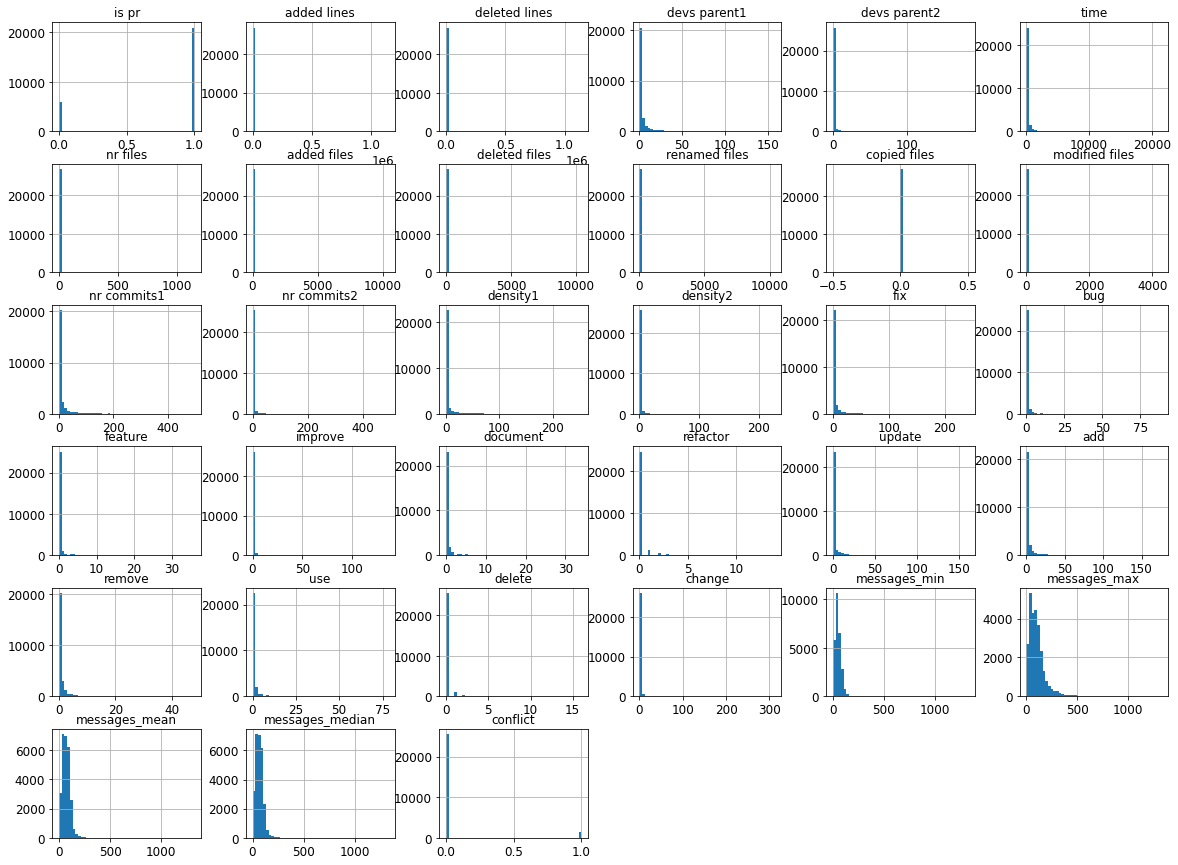

In [71]:
%matplotlib inline
data.hist(bins=50,figsize=(20,15))
plt.show()

In [72]:
le = LabelEncoder()

data_to_encode = data[['commit', 'parent1', 'parent2', 'ancestor']]
data_encoded = data_to_encode.apply(le.fit_transform)

<AxesSubplot:>

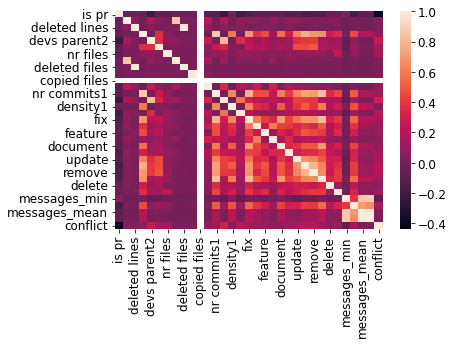

In [73]:
sns.heatmap(data.corr())

<AxesSubplot:xlabel='count', ylabel='conflict'>

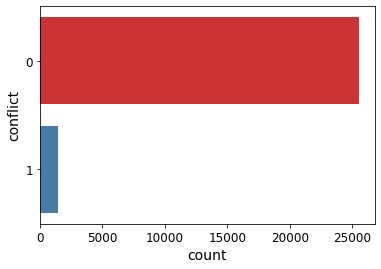

In [74]:
sns.countplot(y=data['conflict'],palette='Set1')# vizualizam nr de conflicte raportat la atunci cand nu avem conflicte

In [75]:
data_encoded

,commit,parent1,parent2,ancestor
0,25221,26009,9902,18220
1,4287,11977,26298,11674
2,24373,5702,19615,3955
3,1272,6900,14041,18408
4,7015,12524,9848,2603
...,...,...,...,...
26983,20783,9786,22545,6839
26984,14880,16800,7497,17034
26985,17175,8845,23199,6136
26986,23403,8845,24118,6136


In [76]:
data[['commit', 'parent1', 'parent2', 'ancestor']] = data_encoded

In [77]:
data


,commit,parent1,parent2,ancestor,is pr,added lines,deleted lines,devs parent1,devs parent2,time,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
0,25221,26009,9902,18220,1,5,0,0,1,23,...,0,0,0,0,0,20,65,35.40000,20.0,0
1,4287,11977,26298,11674,0,1166,11267,1,2,371,...,0,0,0,0,0,31,117,58.56383,53.5,1
2,24373,5702,19615,3955,1,0,0,0,1,22,...,0,0,0,0,0,18,18,18.00000,18.0,0
3,1272,6900,14041,18408,1,0,0,2,1,24,...,0,0,0,0,0,22,63,38.80000,31.0,0
4,7015,12524,9848,2603,0,0,0,1,2,2,...,0,0,0,0,0,31,56,43.50000,43.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26983,20783,9786,22545,6839,1,66,0,0,1,184,...,0,0,0,0,0,19,19,19.00000,19.0,0
26984,14880,16800,7497,17034,1,1,1,2,1,762,...,0,0,0,0,0,30,34,33.20000,34.0,0
26985,17175,8845,23199,6136,1,1,1,0,1,22,...,0,0,0,0,0,8,58,33.00000,33.0,0
26986,23403,8845,24118,6136,1,1,1,0,1,11,...,0,0,0,0,0,8,8,8.00000,8.0,0


In [78]:
train, test = train_test_split(data, test_size=0.2, random_state=42) # Take 0.25 from the data for tests

In [79]:
train

,commit,parent1,parent2,ancestor,is pr,added lines,deleted lines,devs parent1,devs parent2,time,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
3165,12521,10136,14770,12580,0,1754,89,1,9,402,...,1,1,0,1,3,38,139,79.782609,79.0,0
19318,1227,7488,18265,5188,1,3,3,0,1,28,...,0,0,0,0,0,49,49,49.000000,49.0,0
22770,3252,6171,7759,4006,1,2,2,42,1,133,...,19,4,13,0,4,74,207,122.084615,119.0,0
21983,24344,23184,9949,411,1,2,8,4,1,26,...,2,0,0,0,1,62,126,89.285714,83.0,0
2074,4929,14464,11316,10122,1,3706,1,0,1,3,...,0,0,0,0,0,32,32,32.000000,32.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,974,6985,11489,2078,1,1,0,2,1,16,...,0,0,1,0,0,81,125,103.000000,103.0,0
5390,10473,7517,17581,15984,1,186,132,2,1,96,...,0,0,1,0,1,94,99,96.500000,96.5,0
860,22497,10313,16770,9925,1,15,15,2,1,107,...,0,0,0,0,0,36,69,46.800000,43.0,0
15795,9848,1785,5546,7933,0,48,0,1,1,18,...,2,0,0,0,0,93,93,93.000000,93.0,0


In [80]:
test

,commit,parent1,parent2,ancestor,is pr,added lines,deleted lines,devs parent1,devs parent2,time,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
21434,14909,21459,25941,626,1,80,0,5,1,34,...,3,0,0,0,0,43,106,64.000000,57.5,0
15825,8295,24188,10091,5531,0,6,2,1,1,32,...,0,0,0,0,0,39,39,39.000000,39.0,0
8449,21576,3747,5304,2647,1,421,1,0,1,87,...,1,0,1,0,0,58,58,58.000000,58.0,0
3200,8739,11310,9809,50,0,287,1,7,1,173,...,16,3,2,1,3,83,154,114.904762,114.0,1
23259,7899,9177,10265,6389,1,4,4,0,1,15,...,0,0,1,0,1,83,83,83.000000,83.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,17777,16843,23458,4391,1,9,3,5,1,276,...,13,5,1,0,0,52,326,122.136364,97.0,0
24966,25428,21627,10744,944,1,249,4,24,2,293,...,23,4,2,0,3,23,148,77.098361,80.0,0
15983,2909,24291,26305,869,0,23,41,1,1,24,...,1,0,0,0,0,43,61,53.666667,57.0,1
16217,7980,252,909,8629,1,1284,0,27,2,311,...,10,7,4,2,21,12,220,61.934295,60.0,0


In [81]:
x = train[train.columns.drop(['conflict'])]
y = train['conflict']
xt = test[test.columns.drop(['conflict'])]
yt = test['conflict']

In [82]:
x

,commit,parent1,parent2,ancestor,is pr,added lines,deleted lines,devs parent1,devs parent2,time,...,update,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median
3165,12521,10136,14770,12580,0,1754,89,1,9,402,...,2,1,1,0,1,3,38,139,79.782609,79.0
19318,1227,7488,18265,5188,1,3,3,0,1,28,...,0,0,0,0,0,0,49,49,49.000000,49.0
22770,3252,6171,7759,4006,1,2,2,42,1,133,...,8,19,4,13,0,4,74,207,122.084615,119.0
21983,24344,23184,9949,411,1,2,8,4,1,26,...,0,2,0,0,0,1,62,126,89.285714,83.0
2074,4929,14464,11316,10122,1,3706,1,0,1,3,...,0,0,0,0,0,0,32,32,32.000000,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,974,6985,11489,2078,1,1,0,2,1,16,...,1,0,0,1,0,0,81,125,103.000000,103.0
5390,10473,7517,17581,15984,1,186,132,2,1,96,...,0,0,0,1,0,1,94,99,96.500000,96.5
860,22497,10313,16770,9925,1,15,15,2,1,107,...,4,0,0,0,0,0,36,69,46.800000,43.0
15795,9848,1785,5546,7933,0,48,0,1,1,18,...,0,2,0,0,0,0,93,93,93.000000,93.0


In [83]:
y

3165     0
19318    0
22770    0
21983    0
2074     0
        ..
21575    0
5390     0
860      0
15795    0
23654    0
Name: conflict, Length: 21590, dtype: int64

In [84]:
xt

,commit,parent1,parent2,ancestor,is pr,added lines,deleted lines,devs parent1,devs parent2,time,...,update,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median
21434,14909,21459,25941,626,1,80,0,5,1,34,...,0,3,0,0,0,0,43,106,64.000000,57.5
15825,8295,24188,10091,5531,0,6,2,1,1,32,...,0,0,0,0,0,0,39,39,39.000000,39.0
8449,21576,3747,5304,2647,1,421,1,0,1,87,...,0,1,0,1,0,0,58,58,58.000000,58.0
3200,8739,11310,9809,50,0,287,1,7,1,173,...,2,16,3,2,1,3,83,154,114.904762,114.0
23259,7899,9177,10265,6389,1,4,4,0,1,15,...,0,0,0,1,0,1,83,83,83.000000,83.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,17777,16843,23458,4391,1,9,3,5,1,276,...,4,13,5,1,0,0,52,326,122.136364,97.0
24966,25428,21627,10744,944,1,249,4,24,2,293,...,10,23,4,2,0,3,23,148,77.098361,80.0
15983,2909,24291,26305,869,0,23,41,1,1,24,...,1,1,0,0,0,0,43,61,53.666667,57.0
16217,7980,252,909,8629,1,1284,0,27,2,311,...,14,10,7,4,2,21,12,220,61.934295,60.0


In [85]:
yt

21434    0
15825    0
8449     0
3200     1
23259    0
        ..
1571     0
24966    0
15983    1
16217    0
11177    0
Name: conflict, Length: 5398, dtype: int64

In [86]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
xt = sc.transform(xt)

In [87]:
from sklearn.metrics import confusion_matrix,accuracy_score,make_scorer

#vizualizez valorile pentru fiecare sample generat de cl
def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]

#cross validation purpose
scoring = {'accuracy': make_scorer(accuracy_score),'prec': 'precision'}
scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn)}

def display_result(result):
    print("TP: ",result['test_tp'])
    print("TN: ",result['test_tn'])
    print("FN: ",result['test_fn'])
    print("FP: ",result['test_fp'])

In [88]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate


acc=[]
roc=[]

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets 
clf.fit(x,y)

y_pred=clf.predict(xt)
y_pred1=clf.predict(x)

ac=accuracy_score(yt,y_pred)
acc.append(ac)

rc=roc_auc_score(yt,y_pred)
roc.append(rc)
print("\nAccuracy {0} ROC {1}".format(ac,rc))


#cross val score
result=cross_validate(clf,x,y,scoring=scoring,cv=10)
#print("Decision Tree classifier with entropy:", sum(result)/10")
display_result(result)


Accuracy 0.9686921081882178 ROC 0.7839416239320948
TP:  [67 62 69 79 62 64 70 74 67 73]
TN:  [2017 2023 2022 2021 2023 2013 2012 2021 2016 2019]
FN:  [51 56 49 39 56 55 49 45 52 46]
FP:  [24 18 19 20 18 27 28 19 24 21]


In [89]:
import warnings
warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"
#Evualuarea cu ajutorul confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
#confusion matrix ia ca parametri valoarea ce stim ca e corecta si cea rezultata in urma algoritmului de clasificare
cm = confusion_matrix(yt, y_pred)
#construieste un raport si arata metricile de masurare-mediile ponderate si neponderate
print(classification_report(yt, y_pred))
print(cm)
accuracy_score(yt, y_pred)
#precision-capacitatea clasificatorului de a nu eticheta un eșantion negativ ca pozitiv.
#recall-capacitatea clasificatorului de a găsi toate probele pozitive.
#f1-score-medie ponderata a precision si recall, atinge cea mai buna valoarea la 1 si cel mai slab scor la 0
#support-numărul de apariții ale fiecărei clase(0/1) în y_test.

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      5114
           1       0.77      0.58      0.66       284

    accuracy                           0.97      5398
   macro avg       0.87      0.78      0.82      5398
weighted avg       0.97      0.97      0.97      5398

[[5065   49]
 [ 120  164]]


0.9686921081882178